#**> Goal : 💡 Customer Churn Analysis and Prediction**
---
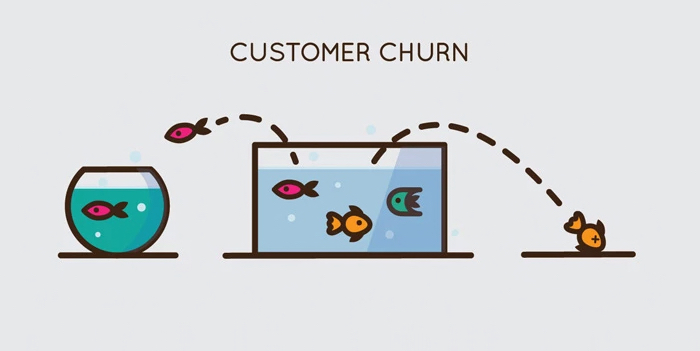


- **기획 배경**
    - `"월 구독료만 모아도 월세가 나온다"` 는 말이 있듯이, 사용자들은 본인 취향에 맞는 다양한 구독 서비스를 이용하고 있다.  
    이러한 상황에서 서비스 제공자는 `고객 이탈`을 가장 두려워 할 수 밖에 없다.  
    신규 가입자는 점점 줄어들고 플랫폼은 다양화 되니, 시장은 한정된 파이를 나눠 가져야 하는 셈이다.

    - 여기서 중요한 점은 신규 가입자를 유치시키는 방향보다, 서비스를 누리고 있는 기존 고객을 지키는 것이 무엇보다 중요하다.  
    기존 고객을 지키지 않고, 신규 고객만을 바라본다면 밑빠진 독에 물붓기 격일 테니 말이다.
    - 때문에 매출이나 마케팅 예산 측면에서 어렵게 확보한 고객을 놓치지 않는 것이 여러모로 유리하다.
    - 따라서 고객 이탈률이 지속해서 증가한다면 그 이유를 철저히 분석해야 할 것이고,  
    이용자의 이탈률을 낮춤과 동시에 서비스 충성도를 높이는 방향을 모색해야 할 것이다.

- **사용 데이터** : [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)
    - Telco? : 통신분야(Tele-communication). 국내의 경우 KT, SKT, U+의 통신3사가 거의 과점을 하고 있다.
    - 특히 통신 산업 분야는 시장 포화 상태로, 신규 가입자를 유치시키는 것이 점점 어려워 지고 있다.
    
- **주요 안건**
    - 고객 이탈에 많은 영향을 미치는 요인은 무엇인가?
    - 고객 이탈을 막기 위해서는 향후 어떠한 서비스를 제공해야 하는가?

  

## **Step 1. Introduction**

### **1-1. Import Packages and Data**

In [ ]:
# Import Packages
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [ ]:
# Data manipulation, visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, modeling, and evaluation


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

# 캐글 데이터셋 리스트 확인
!kaggle datasets list

In [ ]:
# 파일 API 등록
! kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 52.1MB/s]


In [ ]:
# 파일 압축 해제
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **1-2. Data Cleaning**

#### **1-2-1. 데이터 타입 변경 및 결측치 처리**

In [ ]:
# 데이터 타입 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**1) 불필요한 컬럼 삭제**  
불필요한 컬럼인, `customerID` 컬럼 삭제

In [ ]:
# customerID 컬럼 삭제
df = df.drop('customerID', axis=1)

**2) 데이터 타입 변경 및 결측치 처리**  
`TotalCharges` 컬럼의 데이터 타입이 `object`로 되어 있기 때문에 이를 변경

In [ ]:
# TotalCharges 컬럼 dtype 변경
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
# 해당 컬럼 결측치 확인
df['TotalCharges'].isnull().sum()

11

In [ ]:
# 결측 데이터 삭제
df.dropna(inplace=True)
df = df.reset_index(drop=True)

# 전체 결측치 확인
df.isna().sum() # 결측치 없음

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### **1-2-2. 컬럼 별 데이터 확인**  
* **gender** — 고객의 성별
* **SeniorCitizen** — 고객이 노인인지 여부
* **Partner** — 고객에게 파트너가 있는지 여부
* **Dependents** — 고객에게 부양 가족이 있는지 여부
* **tenure** — 고객이 계약을 유지한 개월 수
* **PhoneService** — 고객에게 전화 서비스가 있는지 여부
* **MultipleLines** — 고객에게 여러 회선이 있는지 여부
* **InternetService** — 고객의 인터넷 서비스 제공 업체 
* **OnlineSecurity** — 고객의 온라인 보안 여부 
* **OnlineBackup** — 고객의 온라인 백업 여부 
* **DeviceProtection** — 고객의 기기 보호 여부 
* **TechSupport** — 고객의 기술 지원 여부 
* **StreamingTV** — 고객이 스트리밍 TV를 가지고 있는지 여부 
* **StreamingMovies** — 고객이 스트리밍 영화를 가지고 있는지 여부
* **Contract** — 고객의 계약 기간
* **PaperlessBilling** — 종이 없는 청구서 여부
* **PaymentMethod** — 고객의 결제 방법
* **MonthlyCharges** — 매월 고객에게 청구되는 금액
* **TotalCharges** — 고객에게 청구 된 총 금액
* **Churn(target)** — 고객 이탈 여부

In [ ]:
# 컬럼 정보 확인
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
# 컬럼 별 unique 값 확인
for col in df.columns:
  print(f"{col}: \n{df[col].unique()}\n")

gender: 
['Female' 'Male']

SeniorCitizen: 
[0 1]

Partner: 
['Yes' 'No']

Dependents: 
['No' 'Yes']

tenure: 
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService: 
['No' 'Yes']

MultipleLines: 
['No phone service' 'No' 'Yes']

InternetService: 
['DSL' 'Fiber optic' 'No']

OnlineSecurity: 
['No' 'Yes' 'No internet service']

OnlineBackup: 
['Yes' 'No' 'No internet service']

DeviceProtection: 
['No' 'Yes' 'No internet service']

TechSupport: 
['No' 'Yes' 'No internet service']

StreamingTV: 
['No' 'Yes' 'No internet service']

StreamingMovies: 
['No' 'Yes' 'No internet service']

Contract: 
['Month-to-month' 'One year' 'Two year']

PaperlessBilling: 
['Yes' 'No']

PaymentMethod: 
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges: 
[29.85 56.95 53.85 .

**1) `SeniorCitizen`컬럼 응답 변경**  
1/0 응답의 경우, Yes/No 으로 변경

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

**2) `tenure` 컬럼**  
`tenure`컬럼의 경우 `계약을 유지한 개월 수`를 의미하므로, 12개월 즉 1년 단위로 범위를 구분해 정리할 필요가 있음

In [ ]:
# max값 확인
df["tenure"].max()  # 최대 72개월 = 최대 6년

72

In [ ]:
def transform_tenure(l):
    l2 = []
    for i in l:
        if 1 <= i <= 12:
            l2.append(1)
        elif i <= 24:
            l2.append(2)
        elif i <= 36:
            l2.append(3)
        elif i <= 48:
            l2.append(4)
        elif i <= 60:
            l2.append(5)
        else:
            l2.append(6)
    return(l2)
df['tenure'] = transform_tenure(df['tenure'])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,3,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,1,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,4,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Step 2. Exploratory Data Analysis**  

### **2-1. Target : `Churn`**
`고객 이탈 여부, 즉 Churn을 예측하는 것이 목표`이기에, 타겟은 `Churn`여부가 되며 이는 1/0의 이진 분류 문제가 된다.  
따라서 먼저 타겟의 비율을 확인할 필요가 있다.

In [ ]:
# Churn feature 비율 확인
churn_feature = pd.DataFrame({'Churn count':df['Churn'].value_counts()})
churn_feature['Churn rate(%)'] = (churn_feature['Churn count'] / len(df))*100

churn_feature

,Churn count,Churn rate(%)
No,5163,73.421502
Yes,1869,26.578498


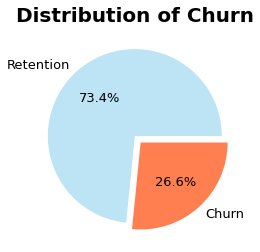

In [ ]:
plt.pie(churn_feature['Churn count'], labels=['Retention', 'Churn'], autopct='%0.1f%%', colors = ["#BDE4F4", "#FF7F50"], explode = [0,0.1], textprops = {"fontsize":13})

plt.title("Distribution of Churn", y = 1, size = 20, fontweight ="bold");
plt.show()

전체 고객 중, 약 `27%`의 고객이 서비스 이용을 중단하는 것으로 확인된다.  
적지 않은 고객이 빠져나가는 것으로 보아, 이탈/유지 고객 간의 구분되는 지점이 있을 것이다.

### **2-2. Feature**

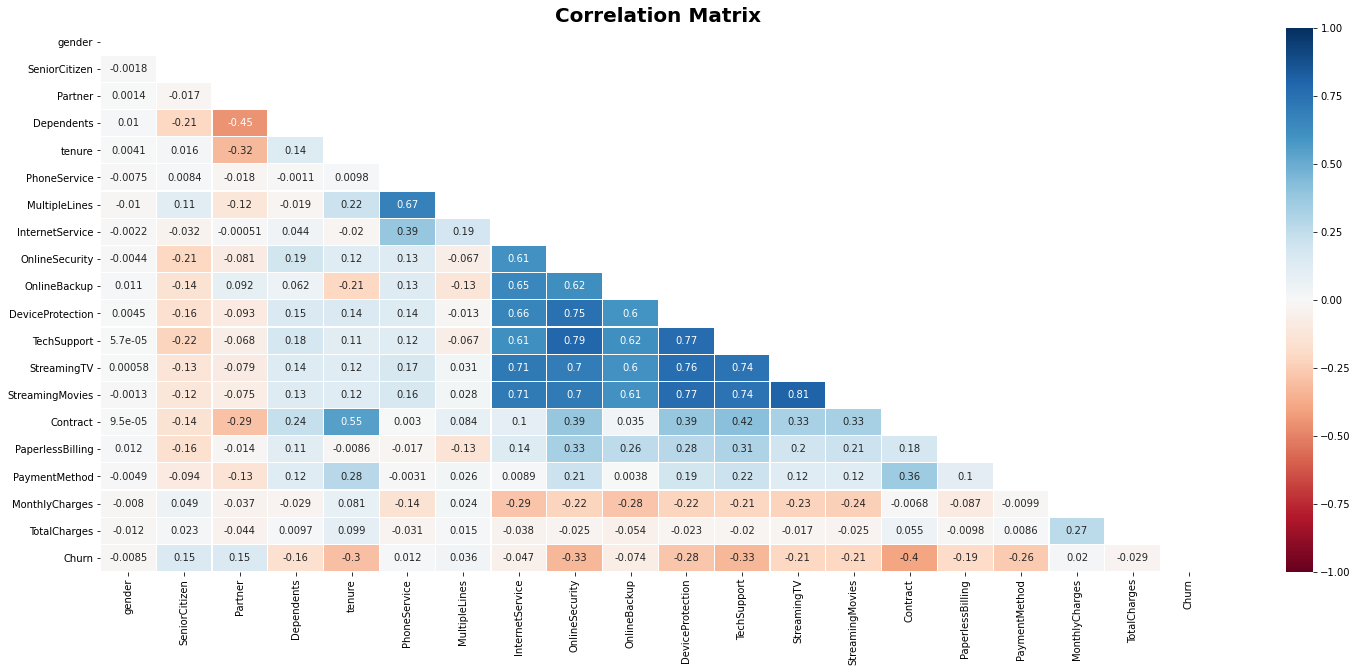

In [ ]:
# feature 간의 상관관계 파악
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.title("Correlation Matrix", y = 1, size = 20, fontweight ="bold");
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='RdBu', vmin=-1, vmax=1)

계약및 요금과 관련된 feature(`tenure`, `Contract`)가 높은 상관관계를 보이므로 이를 주목할 필요가 있다.  
나아가 인터넷 서비스 간의 연관성이 높으므로 이 역시 확인해 볼 필요가 있다.

살펴볼 feature는 다음과 같이 3부분으로 나누었다.

- 인터넷 서비스와 관련된 feature  
    `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, 	`StreamingTV`, `StreamingMovies`

- 서비스 계약과 관련된 feature  
    `contract`, `payment method`, `paperless billing`
    
- 실 사용 기간과 요금 feature  
    `tenure`, `MonthlyCharges`, `TotalCharges`

#### **2-2-1. 인터넷 서비스 관련**

In [ ]:
# 이탈/유지 고객 구분
retain_users = df[df['Churn'] == 'No']
churned_users = df[df['Churn'] == 'Yes']

retain_internet_users = retain_users[retain_users['InternetService'] != 'No']
churned_internet_users = churned_users[churned_users['InternetService'] != 'No']

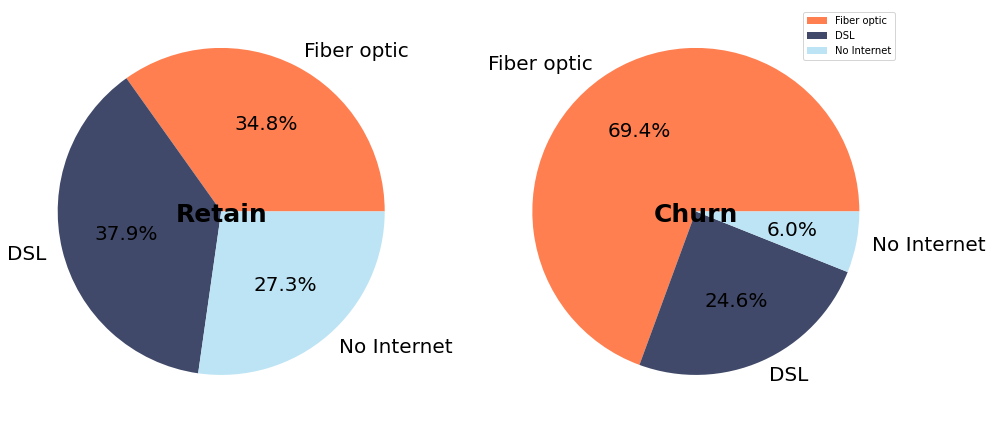

In [ ]:
# 인터넷 사용 여부
# 데이터 지정
labels = ['Fiber optic','DSL','No Internet']
values_retain = [
    retain_users[retain_users['InternetService'] == 'Fiber optic'].shape[0],
    retain_users[retain_users['InternetService'] == 'DSL'].shape[0],
    retain_users[retain_users['InternetService'] == 'No'].shape[0]
]

values_churned = [
    churned_users[churned_users['InternetService'] == 'Fiber optic'].shape[0],
    churned_users[churned_users['InternetService'] == 'DSL'].shape[0],
    churned_users[churned_users['InternetService'] == 'No'].shape[0]
]

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(14, 9))

ax[0].pie(values_retain, labels=labels, autopct='%0.1f%%', colors = ['#FF7F50','#404969','#BDE4F4'], textprops = {"fontsize":20})
ax[0].set_title("Retain", y = 0.46, size = 25, fontweight ="bold")


ax[1].pie(values_churned, labels=labels, autopct='%0.1f%%', colors = ['#FF7F50','#404969','#BDE4F4'], textprops = {"fontsize":20})
ax[1].set_title("Churn", y = 0.46, size = 25, fontweight ="bold")

plt.legend(loc='upper right');
plt.tight_layout();

서비스 유지 고객과 달리, 이탈 고객의 상당수(약 70%)는 `광섬유 인터넷`을 사용한 것으로 확인되었다.  
`광섬유 인터넷`은 속도가 빠르지만 상대적으로 높은 가격대의 상품이다.  
이후 `요금 관련 feature`와 관련지어 살펴 볼 필요가 있다.

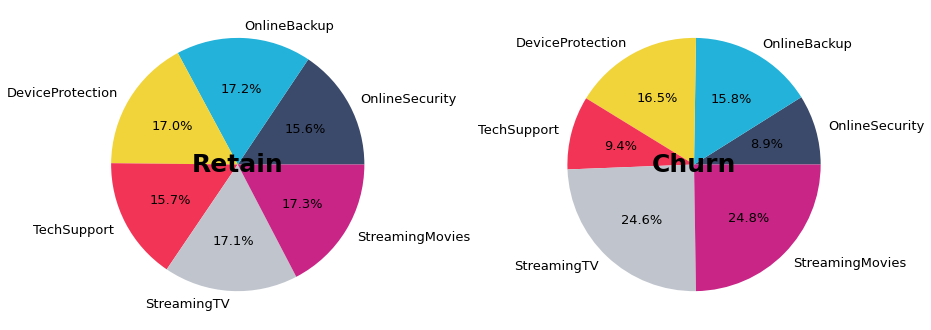

In [ ]:
# 인터넷 서비스 사용
# 데이터 지정
labels = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
values_retain_internet_ser = [
    retain_internet_users[retain_internet_users['OnlineSecurity'] == 'Yes'].shape[0],
    retain_internet_users[retain_internet_users['OnlineBackup'] == 'Yes'].shape[0],
    retain_internet_users[retain_internet_users['DeviceProtection'] == 'Yes'].shape[0],
    retain_internet_users[retain_internet_users['TechSupport'] == 'Yes'].shape[0],
    retain_internet_users[retain_internet_users['StreamingTV'] == 'Yes'].shape[0],
    retain_internet_users[retain_internet_users['StreamingMovies'] == 'Yes'].shape[0]
]

values_churned_internet_ser = [
    churned_internet_users[churned_internet_users['OnlineSecurity'] == 'Yes'].shape[0],
    churned_internet_users[churned_internet_users['OnlineBackup'] == 'Yes'].shape[0],
    churned_internet_users[churned_internet_users['DeviceProtection'] == 'Yes'].shape[0],
    churned_internet_users[churned_internet_users['TechSupport'] == 'Yes'].shape[0],
    churned_internet_users[churned_internet_users['StreamingTV'] == 'Yes'].shape[0],
    churned_internet_users[churned_internet_users['StreamingMovies'] == 'Yes'].shape[0]
]

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(13, 8))

ax[0].pie(values_retain_internet_ser, labels=labels, autopct='%0.1f%%', colors = ['#3B4A6B','#22B2DA','#F0D43A','#F23557','#C0C5CD','#C82586'], textprops = {"fontsize":13})
ax[0].set_title("Retain", y = 0.46, size = 25, fontweight ="bold")

ax[1].pie(values_churned_internet_ser, labels=labels, autopct='%0.1f%%', colors =['#3B4A6B','#22B2DA','#F0D43A','#F23557','#C0C5CD','#C82586'], textprops = {"fontsize":13})
ax[1].set_title("Churn", y = 0.46, size = 25, fontweight ="bold")

plt.tight_layout();

인터넷 서비스 사용 부분에서 눈에 띄는 특징은 없어 보인다.

#### **2-2-2. 서비스 계약 관련**

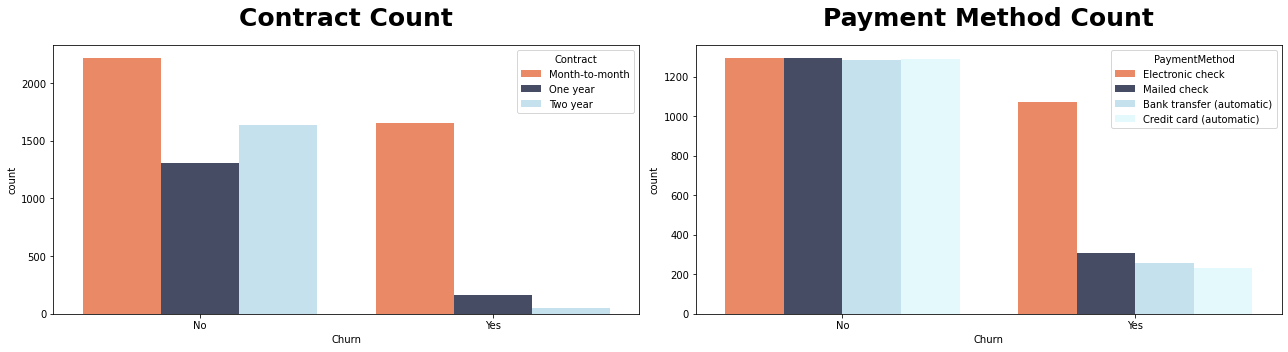

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(18, 5))

# 색 지정
colors1 = ['#FF7F50','#404969','#BDE4F4']
colors2 = ['#FF7F50','#404969','#BDE4F4', '#E0FCFF']

#시각화
sns.countplot(data=df, x='Churn', hue='Contract', ax=axes[0], palette=colors1);
axes[0].set_title("Contract Count", y = 1.05, size = 25, fontweight ="bold")

sns.countplot(data=df, x='Churn', hue='PaymentMethod', ax=axes[1], palette=colors2);
axes[1].set_title("Payment Method Count", y = 1.05, size = 25, fontweight ="bold")

plt.tight_layout();

`계약 기간이 짧은 고객일 수록 이탈률이 높은 것`을 확인할 수 있다.  
특히 매월 갱신하는 계약의 경우, 눈에 띄는 고객 이탈을 확인할 수 있다.

계약을 매월 갱신하는 상황에서는 지속적으로 서비스에 대해 생각하게 될 것이다.  
만일 2년 단위로 계약을 갱신하는 고객이라면, 서비스를 이용하지 않더라도 이에 관해 잊고 있을수도 있고 혹은 이왕 결제를 했으니 이용해보자 하는 생각이 들 수도 있을 것이다.  

하지만 매월 갱신하는 계약의 경우, 해당 서비스에 대해 끊임없이 판단해야 하는 상황에 놓일 것이므로 작은 불만에도 쉽게 이탈할 가능성이 있다.
특히 자동 결제가 아닌 다른 결제 방식에서 이탈률이 높은 것으로 보아, 매번 요금에 비해 충분한 서비스를 받고 있는지 생각했을 가능성이 있다.


#### **2-2-3. 실 사용 기간 및 요금 관련**

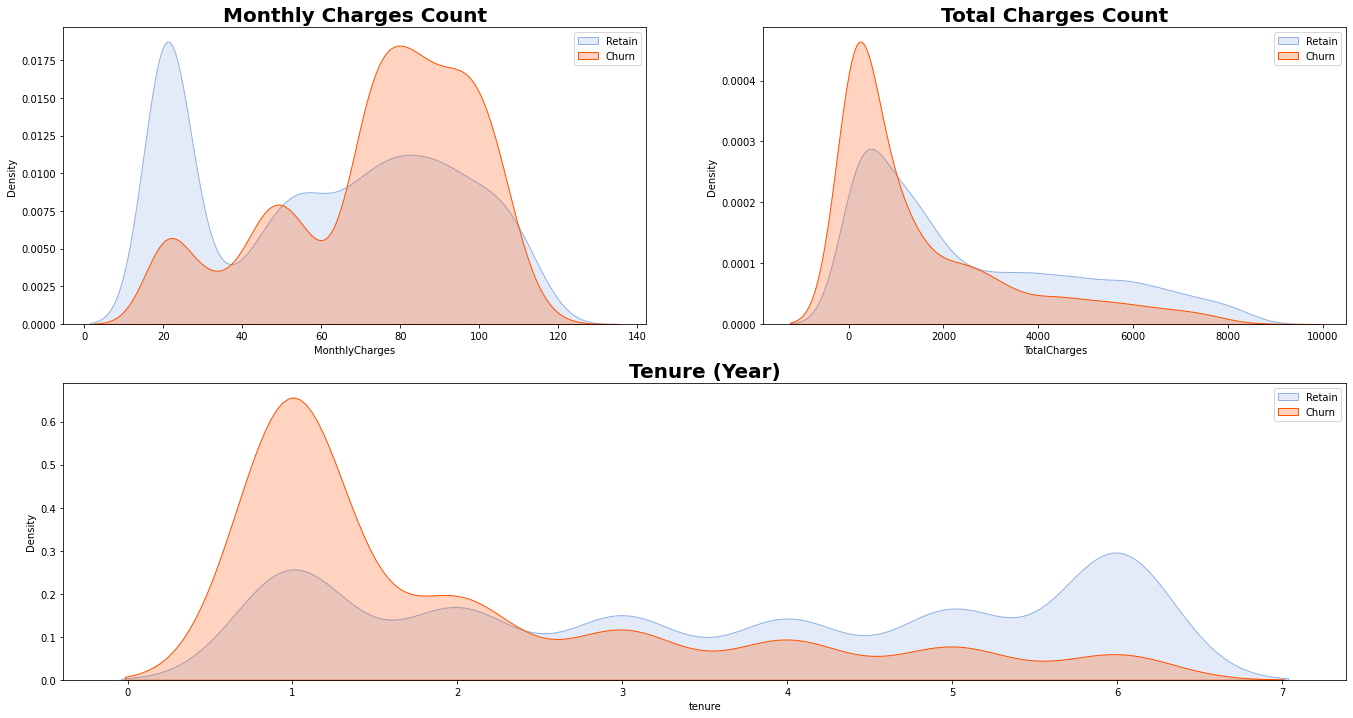

In [ ]:
# 색 지정
colors = ['#90B2E4', '#FF5200']
sns.set_palette(sns.color_palette(colors))
fig = plt.figure(figsize=(23, 12)) 

#시각화
plt.subplot(221)
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ], shade = True);
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], shade = True);
plt.legend(["Retain","Churn"],loc='upper right');
plt.title("Monthly Charges Count", size = 20, fontweight ="bold")

plt.subplot(222)
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ], shade = True);
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ], shade = True);
plt.legend(["Retain","Churn"],loc='upper right');
plt.title("Total Charges Count", size = 20, fontweight ="bold")

plt.subplot(212)
sns.kdeplot(df.tenure[(df["Churn"] == 'No') ], shade = True);
sns.kdeplot(df.tenure[(df["Churn"] == 'Yes') ], shade = True);
plt.legend(["Retain","Churn"],loc='upper right');
plt.title("Tenure (Year)", size = 20, fontweight ="bold")

plt.show()

한 달동안 이탈 고객은 서비스 유지 고객에 비해 `평균적으로 2배 이상 많은 요금을 지불`하고 있다.  
위의 계약을 한 달마다 갱신하는 것과 관련지어 생각한다면, 이탈 고객은 상대적으로 많은 요금을 매월 마주해야 하기 때문에 서비스에 대한 부담감이 생길 수 있는 것이다.  
또한 이탈 고객이 가격이 높은 광섬유 인터넷의 비율이 높은 것을 생각해 본다면 그들의 많은 요금도 이해가 된다.  

나아가 대다수의 이탈 고객은 `1~2년 사이에 서비스를 중단`하는 것으로 확인된다.

## **Step 3. Modeling**
EDA를 통해 얻은 인사이트를 적용할 수 있도록, `이탈 가능성이 있는 고객을 선별하는 모델`을 만들고자 한다.

### **3-1. Target 및 데이터 셋 설정**

**데이터 셋 전처리**

In [ ]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
data = df.apply(lambda x: object_to_int(x))

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,3,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,4,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**model 평가 지표**

In [ ]:
def evaluate(y_real,y_pred, y_prob):
    acc = accuracy_score(y_real, y_pred)
    rec = recall_score(y_real, y_pred)
    f1 = f1_score(y_real, y_pred)
    auc = roc_auc_score(y_real, y_prob)
    print('Accuracy : {:.6f}'.format(acc)) #정확도 : 예측이 정답과 얼마나 정확한가
    print('Recall : {:.6f}'.format(rec)) #재현율 : 정답 중에서 예측한 것의 비율
    print('F1 score : {:.6f}'.format(f1)) #정밀도와 재현율의 (조화)평균 - 정밀도와 재현율이 비슷할수록 높은 점수
    print('ROC curve_auc score : {:.6f}'.format(auc))
    
    score_list = [acc,rec,f1,auc]
    score_box = np.array(score_list)
    return score_box

In [ ]:
model_box = pd.DataFrame(columns=['Logistic','XgBoost','SVC','AdaBoost'],
                         index = ['accuracy','recall','f1 score','roc_auc'])

**데이터 셋 설정**

In [ ]:
# 타겟 설정
target = 'Churn'
features = data.columns.drop(target)

In [ ]:
# 훈련/검증/테스트 세트 분리
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.20, 
                              stratify=data[target], random_state=2)
train, val = train_test_split(train, test_size=0.20, 
                              stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((4500, 20), (1125, 20), (1407, 20))

In [ ]:
# 훈련/검증/테스트 데이터를 특성과 타겟으로 분리
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
# 타겟 비율 확인
train[target].value_counts(normalize=True)  ## 비대칭 -> 차후 불균형 클래스 보완 필요

0    0.734222
1    0.265778
Name: Churn, dtype: float64

In [ ]:
# 기준모델의 정확도 계산
from sklearn.metrics import accuracy_score
major = data[target].mode().loc[0]

y_pred = [major] * len(data[target])
print("Baseline Accuracy Score : ", accuracy_score(data[target], y_pred))

Baseline Accuracy Score :  0.7342150170648464


### **3-2. Modeling**

#### **3-2-1. Logistic Regression**

**1) model 학습**

In [ ]:
from sklearn.linear_model import LogisticRegression
from category_encoders import CatBoostEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer

pipe_lr = make_pipeline(
    CatBoostEncoder(),
    PowerTransformer(),
    LogisticRegression(random_state=2, class_weight='balaced')
)

pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_val)
print('훈련세트 정확도 : ', pipe_lr.score(X_train, y_train))
print('검증세트 정확도 : ', pipe_lr.score(X_val, y_val))
print('---'*20)
print('검증세트 F1-score : ', f1_score(y_val, y_pred))

훈련세트 정확도 :  0.8057777777777778
검증세트 정확도 :  0.8275555555555556
------------------------------------------------------------
검증세트 F1-score :  0.6225680933852139


**2) model 평가**

**Confusion Matrix**

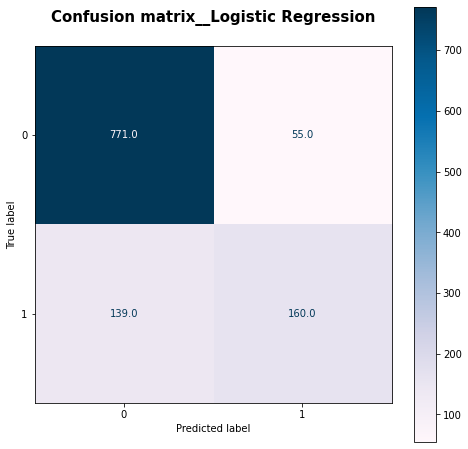


 ---------------- Classification Report ----------------
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       826
           1       0.74      0.54      0.62       299

    accuracy                           0.83      1125
   macro avg       0.80      0.73      0.76      1125
weighted avg       0.82      0.83      0.82      1125



In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

fig, ax = plt.subplots(figsize=(8, 8))

pcm = plot_confusion_matrix(pipe_lr, X_val, y_val,
                            cmap='PuBu',
                            ax=ax, values_format =".1f");

plt.title(f'Confusion matrix__Logistic Regression', y = 1.05, fontsize=15, fontweight ="bold")
plt.show()

y_pred = pipe_lr.predict(X_val)

print('\n','---------------- Classification Report ----------------')
print(classification_report(y_val, y_pred))

**ROC curve, AUC**

AUC score : 0.7342655502198612
Recall score : 0.5351170568561873
------------------------------------------------------------ 



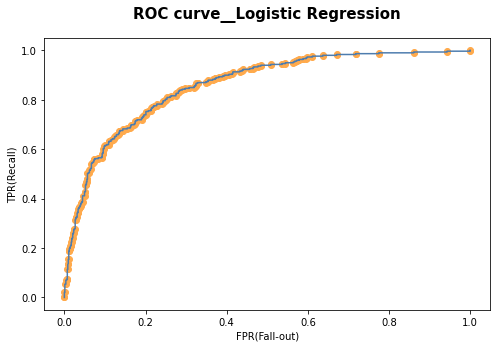

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, f1_score, roc_curve, roc_auc_score

proba_lr = pipe_lr.predict_proba(X_val)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val, proba_lr)

# 시각화
plt.figure(figsize=(8, 5))

plt.plot(fpr_lr, tpr_lr, color='#4D7CAE')
plt.scatter(fpr_lr, tpr_lr, color='#FFAA4C')

plt.title('ROC curve__Logistic Regression', y = 1.05, fontsize=15, fontweight ="bold")
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_lr = roc_auc_score(y_val, y_pred)
recall_score_lr = recall_score(y_val, y_pred)
print(f'AUC score : {auc_score_lr}')
print(f'Recall score : {recall_score_lr}')
print('---'*20, '\n')

**3) Hyperparam Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_lr = {
    'logisticregression__penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'logisticregression__class_weight': ['balanced'],
    'logisticregression__C': [1.0, 0.9, 0.8],
    'logisticregression__max_iter': [300],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__l1_ratio': [1.0, 0.0, 0.3],
}

clf_lr = GridSearchCV(
   estimator=pipe_lr,
   scoring='balanced_accuracy',
   param_grid=param_lr,
   cv=5,
   n_jobs=-1, 
   verbose=3
)

clf_lr.fit(X_train, y_train);

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  2.3min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))


In [ ]:
# 튜닝된 파라미터 확인
print('튜닝된 파라미터 : ', clf_lr.best_params_)

# 최고 정확도
print('하이퍼파라미터 튜닝 이후 최고 정확도 : ', clf_lr.best_score_)

튜닝된 파라미터 :  {'logisticregression__C': 1.0, 'logisticregression__class_weight': 'balanced', 'logisticregression__l1_ratio': 1.0, 'logisticregression__max_iter': 300, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'newton-cg'}
하이퍼파라미터 튜닝 이후 최고 정확도 :  0.759235877773935


In [ ]:
# 최적의 하이퍼파라미터를 적용, 모델의 예측 정확도(accuracy score) 확인

pipe_lr2 = clf_lr.best_estimator_

pipe_lr2.fit(X_train, y_train)

y_train_pred = pipe_lr2.predict(X_train)
y_val_pred = pipe_lr2.predict(X_val)

print('검증 정확도 : ', pipe_lr2.score(X_val, y_val))
print('---'*20)
print('검증세트 F1-score : ', f1_score(y_val, y_val_pred))
print('검증세트 Recall-score : ', recall_score(y_val, y_val_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))


훈련 정확도 :  0.7568888888888889
검증 정확도 :  0.7742222222222223
------------------------------------------------------------
검증세트 Recall-score :  0.5050167224080268


In [ ]:
# Test Data
y_test_pred = pipe_lr2.predict(X_test)

probs = pipe_lr2.predict_proba(X_test)
y_prob = probs[:,1]

model_box['Logistic'] = evaluate(y_test, y_test_pred, y_prob)

Accuracy : 0.757640
Recall : 0.804813
F1 score : 0.638388
ROC curve_auc score : 0.858193


#### **3-2-2. Xgboost**

**1) model 학습**

In [ ]:
from xgboost import XGBClassifier

pipe_xg = make_pipeline(
    CatBoostEncoder(),
    PowerTransformer(),
    XGBClassifier(random_state=2, n_estimators=100, class_weight='balanced')
)

pipe_xg.fit(X_train, y_train)

y_pred = pipe_xg.predict(X_val)
print('훈련세트 정확도 : ', pipe_xg.score(X_train, y_train))
print('검증세트 정확도 : ', pipe_xg.score(X_val, y_val))
print('---'*20)
print('검증세트 F1-score : ', f1_score(y_val, y_pred))

훈련세트 정확도 :  0.8246666666666667
검증세트 정확도 :  0.8231111111111111
------------------------------------------------------------
검증세트 F1-score :  0.6209523809523809


기준모델 보다도 높은 정확도를 보이며, 모델이 얼마나 효과적인지를 보여주는 `f1-score`역시 나쁘지 않다.

**2) model 평가**

**Confusion Matrix**

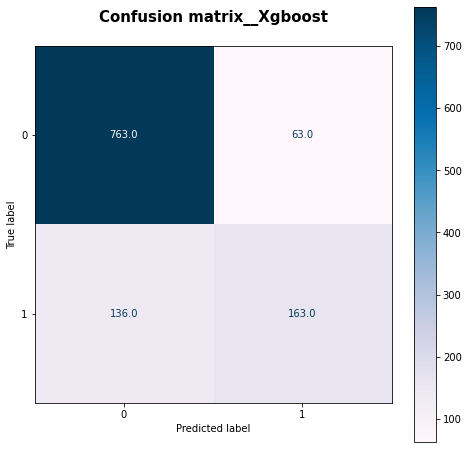


 ---------------- Classification Report ----------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       826
           1       0.72      0.55      0.62       299

    accuracy                           0.82      1125
   macro avg       0.78      0.73      0.75      1125
weighted avg       0.81      0.82      0.81      1125



In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

pcm = plot_confusion_matrix(pipe_xg, X_val, y_val,
                            cmap='PuBu',
                            ax=ax, values_format =".1f");

plt.title(f'Confusion matrix__Xgboost', y = 1.05, fontsize=15, fontweight ="bold")
plt.show()

y_pred = pipe_xg.predict(X_val)

print('\n','---------------- Classification Report ----------------')
print(classification_report(y_val, y_pred))

**ROC curve, AUC**

AUC score : 0.7344396576157813
Recall score : 0.5451505016722408
------------------------------------------------------------ 



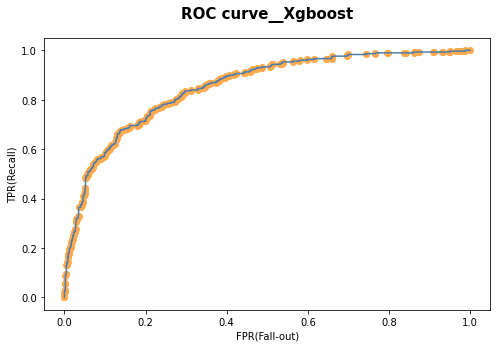

In [ ]:
proba_xg = pipe_xg.predict_proba(X_val)[:, 1]

fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_val, proba_xg)

# 시각화
plt.figure(figsize=(8, 5))

plt.plot(fpr_xg, tpr_xg, color='#4D7CAE')
plt.scatter(fpr_xg, tpr_xg, color='#FFAA4C')

plt.title('ROC curve__Xgboost', y = 1.05, fontsize=15, fontweight ="bold")
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_xg = roc_auc_score(y_val, y_pred)
recall_score_xg = recall_score(y_val, y_pred)
print(f'AUC score : {auc_score_xg}')
print(f'Recall score : {recall_score_xg}')
print('---'*20, '\n')

**3) Hyperparam Tuning**

In [ ]:
param_xg = {
    'xgbclassifier__criterion': ['entrophy', 'gini'],
    'xgbclassifier__max_depth': np.arange(1, 10),
    'xgbclassifier__max_leaf_nodes': np.arange(1, 30, 5),
    'xgbclassifier__min_samples_leaf': np.arange(10, 30, 5)
    
}

clf_xg = GridSearchCV(
   estimator=pipe_xg,
   scoring='balanced_accuracy',
   param_grid=param_xg,
   cv=3,
   n_jobs=-1, 
   verbose=3
)

clf_xg.fit(X_train, y_train);

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  9.1min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# 튜닝된 파라미터 확인
print('튜닝된 파라미터 : ', clf_xg.best_params_)

# 최고 정확도
print('하이퍼파라미터 튜닝 이후 최고 정확도 : ', clf_xg.best_score_)

튜닝된 파라미터 :  {'xgbclassifier__criterion': 'entrophy', 'xgbclassifier__max_depth': 3, 'xgbclassifier__max_leaf_nodes': 1, 'xgbclassifier__min_samples_leaf': 10}
하이퍼파라미터 튜닝 이후 최고 정확도 :  0.7026948280977455


In [ ]:
# 최적의 하이퍼파라미터를 적용, 모델의 예측 정확도(accuracy score) 확인

pipe_xg2 = clf_xg.best_estimator_

pipe_xg2.fit(X_train, y_train)

y_train_pred = pipe_xg2.predict(X_train)
y_val_pred = pipe_xg2.predict(X_val)

print('검증 정확도 : ', pipe_xg2.score(X_val, y_val))
print('---'*20)
print('검증세트 F1-score : ', f1_score(y_val, y_val_pred))
print('검증세트 Recall-score : ', recall_score(y_val, y_val_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 :  0.8246666666666667
검증 정확도 :  0.8231111111111111
------------------------------------------------------------
검증세트 Recall-score :  0.5050167224080268


In [ ]:
# Test Data
y_test_pred = pipe_xg2.predict(X_test)

probs = pipe_xg2.predict_proba(X_test)
y_prob = probs[:,1]

model_box['XgBoost'] = evaluate(y_test, y_test_pred, y_prob)

Accuracy : 0.794598
Recall : 0.508021
F1 score : 0.568012
ROC curve_auc score : 0.853421


#### **3-2-3. SVC**

**1) model 학습**

In [ ]:
from sklearn.svm import SVC

pipe_svc = make_pipeline(
    CatBoostEncoder(),
    PowerTransformer(),
    SVC(random_state = 2, probability=True)
)

pipe_svc.fit(X_train, y_train)

y_pred = pipe_svc.predict(X_val)
print('훈련세트 정확도 : ', pipe_svc.score(X_train, y_train))
print('검증세트 정확도 : ', pipe_svc.score(X_val, y_val))
print('---'*20)
print('검증세트 F1-score : ', f1_score(y_val, y_pred))
print('검증세트 Recall-score : ', recall_score(y_val, y_pred))

훈련세트 정확도 :  0.826
검증세트 정확도 :  0.8115555555555556
------------------------------------------------------------
검증세트 F1-score :  0.5875486381322957


**2) model 평가**

**Confusion Matrix**

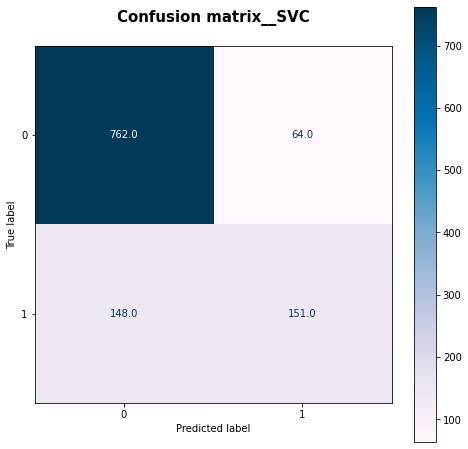


 ---------------- Classification Report ----------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       826
           1       0.70      0.51      0.59       299

    accuracy                           0.81      1125
   macro avg       0.77      0.71      0.73      1125
weighted avg       0.80      0.81      0.80      1125



In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

pcm = plot_confusion_matrix(pipe_svc, X_val, y_val,
                            cmap='PuBu',
                            ax=ax, values_format =".1f");

plt.title(f'Confusion matrix__SVC', y = 1.05, fontsize=15, fontweight ="bold")
plt.show()

y_pred = pipe_svc.predict(X_val)

print('\n','---------------- Classification Report ----------------')
print(classification_report(y_val, y_pred))

**ROC curve, AUC**

AUC score : 0.713767441107161
Recall score : 0.5050167224080268
------------------------------------------------------------ 



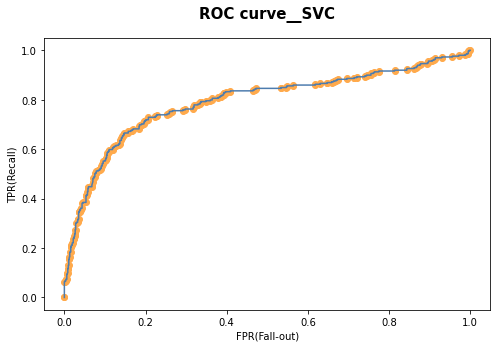

In [ ]:
proba_svc = pipe_svc.predict_proba(X_val)[:, 1]

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_val, proba_svc)

# 시각화
plt.figure(figsize=(8, 5))

plt.plot(fpr_svc, tpr_svc, color='#4D7CAE')
plt.scatter(fpr_svc, tpr_svc, color='#FFAA4C')

plt.title('ROC curve__SVC', y = 1.05, fontsize=15, fontweight ="bold")
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_svc = roc_auc_score(y_val, y_pred)
recall_score_svc = recall_score(y_val, y_pred)
print(f'AUC score : {auc_score_svc}')
print(f'Recall score : {recall_score_svc}')
print('---'*20, '\n')

**3) Hyperparam Tuning**

In [ ]:
param_svc = {
    'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

clf_svc = GridSearchCV(
   estimator=pipe_svc,
   scoring='balanced_accuracy',
   param_grid=param_svc,
   cv=5,
   n_jobs=-1, 
   verbose=3
)

clf_svc.fit(X_train, y_train);

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  6.5min finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# 튜닝된 파라미터 확인
print('튜닝된 파라미터 : ', clf_svc.best_params_)

# 최고 정확도
print('하이퍼파라미터 튜닝 이후 최고 정확도 : ', clf_svc.best_score_)

튜닝된 파라미터 :  {'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
하이퍼파라미터 튜닝 이후 최고 정확도 :  0.7011023283097342


In [ ]:
# 최적의 하이퍼파라미터를 적용, 모델의 예측 정확도(accuracy score) 확인

pipe_svc2 = clf_svc.best_estimator_

pipe_svc2.fit(X_train, y_train)

y_train_pred = pipe_svc2.predict(X_train)
y_val_pred = pipe_svc2.predict(X_val)

print('검증 정확도 : ', pipe_svc2.score(X_val, y_val))
print('---'*20)
print('검증세트 F1-score : ', f1_score(y_val, y_val_pred))
print('검증세트 Recall-score : ', recall_score(y_val, y_val_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도 :  0.8168888888888889
------------------------------------------------------------
검증세트 F1-score :  0.6213235294117646
검증세트 Recall-score :  0.5652173913043478


In [ ]:
# Test Data
y_test_pred = pipe_svc2.predict(X_test)

probs = pipe_svc2.predict_proba(X_test)
y_prob = probs[:,1]

model_box['SVC'] = evaluate(y_test, y_test_pred, y_prob)

Accuracy : 0.788913
Recall : 0.491979
F1 score : 0.553383
ROC curve_auc score : 0.800827


#### **3-2-4. AdaBoost**

**1) model 학습**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

pipe_ada = make_pipeline(
    CatBoostEncoder(),
    PowerTransformer(),
    AdaBoostClassifier(random_state=2, n_estimators=100)
)

pipe_ada.fit(X_train, y_train)

y_pred = pipe_ada.predict(X_val)
print('훈련세트 정확도 : ', pipe_ada.score(X_train, y_train))
print('검증세트 정확도 : ', pipe_ada.score(X_val, y_val))
print('---'*20)
print('검증세트 F1-score : ', f1_score(y_val, y_pred))

훈련세트 정확도 :  0.8102222222222222
검증세트 정확도 :  0.8195555555555556
------------------------------------------------------------
검증세트 F1-score :  0.6103646833013435


**2) model 평가**

**Confusion Matrix**

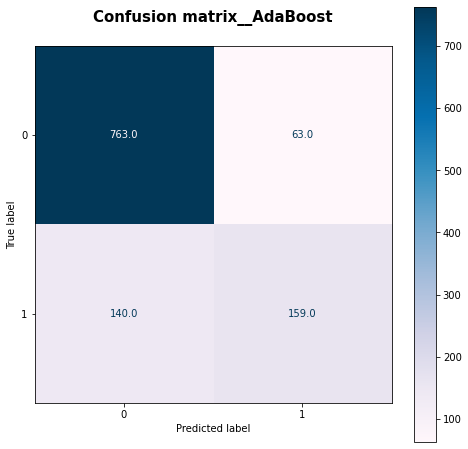


 ---------------- Classification Report ----------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       826
           1       0.72      0.53      0.61       299

    accuracy                           0.82      1125
   macro avg       0.78      0.73      0.75      1125
weighted avg       0.81      0.82      0.81      1125



In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

pcm = plot_confusion_matrix(pipe_ada, X_val, y_val,
                            cmap='PuBu',
                            ax=ax, values_format =".1f");

plt.title(f'Confusion matrix__AdaBoost', y = 1.05, fontsize=15, fontweight ="bold")
plt.show()

y_pred = pipe_ada.predict(X_val)

print('\n','---------------- Classification Report ----------------')
print(classification_report(y_val, y_pred))

**ROC curve, AUC**

AUC score : 0.727750694405079
Recall score : 0.5317725752508361
------------------------------------------------------------ 



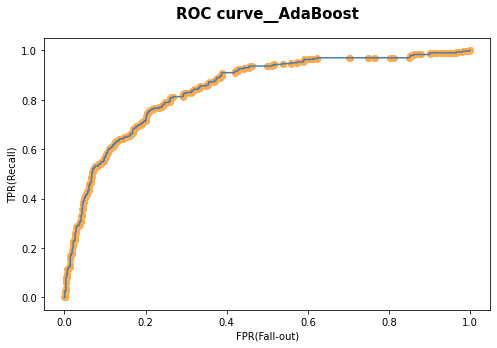

In [ ]:
proba_ada = pipe_ada.predict_proba(X_val)[:, 1]

fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_val, proba_ada)

# 시각화
plt.figure(figsize=(8, 5))

plt.plot(fpr_ada, tpr_ada, color='#4D7CAE')
plt.scatter(fpr_ada, tpr_ada, color='#FFAA4C')

plt.title('ROC curve__AdaBoost', y = 1.05, fontsize=15, fontweight ="bold")
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

auc_score_ada = roc_auc_score(y_val, y_pred)
recall_score_ada = recall_score(y_val, y_pred)
print(f'AUC score : {auc_score_ada}')
print(f'Recall score : {recall_score_ada}')
print('---'*20, '\n')

**3) Hyperparam Tuning**

In [ ]:
param_ada = {
    'adaboostclassifier__n_estimators' : [100, 500],
    'adaboostclassifier__learning_rate' : [0.05, 0.1, 0.5, 1]
}

clf_ada = GridSearchCV(
   estimator=pipe_ada,
   scoring='balanced_accuracy',
   param_grid=param_ada,
   cv=5,
   n_jobs=-1, 
   verbose=3
)

clf_ada.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   49.9s finished
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# 튜닝된 파라미터 확인
print('튜닝된 파라미터 : ', clf_ada.best_params_)

# 최고 정확도
print('하이퍼파라미터 튜닝 이후 최고 정확도 : ', clf_ada.best_score_)

튜닝된 파라미터 :  {'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__n_estimators': 500}
하이퍼파라미터 튜닝 이후 최고 정확도 :  0.7132488162024603


In [ ]:
# 최적의 하이퍼파라미터를 적용, 모델의 예측 정확도(accuracy score) 확인

pipe_ada2 = clf_ada.best_estimator_

pipe_ada2.fit(X_train, y_train)

y_train_pred = pipe_ada2.predict(X_train)
y_val_pred = pipe_ada2.predict(X_val)

print('검증 정확도 : ', pipe_ada2.score(X_val, y_val))
print('---'*20)
print('검증세트 F1-score : ', f1_score(y_val, y_val_pred))
print('검증세트 Recall-score : ', recall_score(y_val, y_val_pred))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도 :  0.8195555555555556
------------------------------------------------------------
검증세트 F1-score :  0.6103646833013435
검증세트 Recall-score :  0.5317725752508361


In [ ]:
# Test Data
y_test_pred = pipe_ada2.predict(X_test)

probs = pipe_ada2.predict_proba(X_test)
y_prob = probs[:,1]

model_box['AdaBoost'] = evaluate(y_test, y_test_pred, y_prob)

Accuracy : 0.793177
Recall : 0.532086
F1 score : 0.577649
ROC curve_auc score : 0.855755


####**3-2-5. Model 비교**

In [ ]:
model_box = model_box.T
model_box = model_box*100
model_box

,accuracy,recall,f1 score,roc_auc
Logistic,75.764037,80.481283,63.838812,85.819300
AdaBoost,79.317697,53.208556,57.764877,85.575475
XgBoost,79.459844,50.802139,56.801196,85.342132
SVC,78.891258,49.197861,55.338346,80.082673


In [ ]:
model_box_t.sort_values(by=['recall'], ascending=False, inplace=True)
model_box_t.style.background_gradient(cmap='Blues').format("{:.1f}")

,accuracy,recall,f1 score,roc_auc
Logistic,75.8,80.5,63.8,85.8
AdaBoost,79.3,53.2,57.8,85.6
XgBoost,79.5,50.8,56.8,85.3
SVC,78.9,49.2,55.3,80.1


고객 이탈을 예측하는 문제에 있어서 오류는 두 가지가 있을 것이다.
- 이탈할 사람을 이탈하지 않을 것이라 잘못 예측하는 경우(낮은 재현율 recall)
- 이탈하지 않을 사람을 이탈할 것이라 잘못 예측하는 경우(낮은 정밀도 precision)  

회사의 입장에서는 전자의 오류가 더 중요한 문제이다.  
후자의 경우 이탈하지 않을 사람을 대상으로 예산을 낭비하는 문제가 발생하지만,  
전자와 같이 잘못 예측한다면 고객은 이탈해 버리고 말 테니 말이다.  

따라서 모델 제작에 있어서 `재현율을 높이는 것`에 집중하고자 한다.  
가장 높은 재현율(recall)을 보여주는 모델은 `80.5`를 기록한 `Logistic Regression`이다.


## **Step 4. Interpreting ML Model**

### **4-1. Feature Importance**

In [ ]:
best_model = clf_lr.best_estimator_

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    best_model, # model
    scoring='balanced_accuracy',
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

permuter.fit(X_val, y_val);

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None,
    feature_names=X_val.columns.tolist() 
)

Weight,Feature
0.1721 ± 0.0152,TotalCharges
0.1149 ± 0.0263,MonthlyCharges
0.0330 ± 0.0144,Contract
0.0078 ± 0.0060,TechSupport
0.0065 ± 0.0084,PhoneService
0.0041 ± 0.0103,tenure
0.0029 ± 0.0098,InternetService
0.0014 ± 0.0041,Dependents
0.0009 ± 0.0009,PaymentMethod
0.0008 ± 0.0037,StreamingMovies


`요금과 서비스 계약과 관련된 요인`이 고객 이탈에 있어서 가장 큰 요소임을 확인할 수 있다.  

### **4-2. Shap을 통한 개별 예측 설명**

In [ ]:
import shap

shap.initjs()

explainer = shap.LinearExplainer(pipe_lr2.named_steps["logisticregression"], masker=shap.maskers.Impute(data=X_train), feature_names=X_train.columns, algorithm="linear")
shap_values = explainer.shap_values(pipe_lr2[:-1].transform(X_test))

shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[[4]], link="logit")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

#**> Proposal**
---

###**향후 서비스 기획 제안 1 : 타겟팅 요금제**
- 이탈 고객에게 있어서 가장 큰 걸림돌은 `비싼 요금`이었다.  
    서비스 유지 고객에 비해 이탈고객은 `평균적으로 2배 이상 많은 요금을 지불`하고 있으며,  
    또한 `광섬유 인터넷`을 선택하는 비율이 높은 것으로 보아 빠른 인터넷을 선호하는 고객층으로 예상된다.

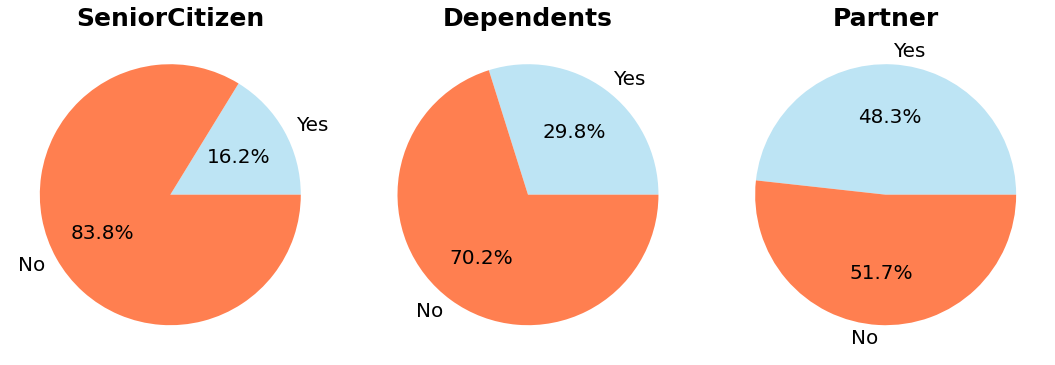

In [ ]:
# 데이터 정리
# 고객이 노인인지 여부
labels = ['Yes', 'No']

values_SeniorCitizen = [
    df[df['SeniorCitizen'] == 'Yes'].shape[0],
    df[df['SeniorCitizen'] == 'No'].shape[0],
]

# 고객에게 부양 가족이 있는지 여부
values_Dependents = [
    df[df['Dependents'] == 'Yes'].shape[0],
    df[df['Dependents'] == 'No'].shape[0],
]

# 고객에게 파트너가 있는지 여부
values_Partner = [
    df[df['Partner'] == 'Yes'].shape[0],
    df[df['Partner'] == 'No'].shape[0],
]


# 시각화
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].pie(values_SeniorCitizen, labels=labels, autopct='%0.1f%%', colors = ['#BDE4F4','#FF7F50'], textprops = {"fontsize":20})
ax[0].set_title("SeniorCitizen", size = 25, fontweight ="bold")

ax[1].pie(values_Dependents, labels=labels, autopct='%0.1f%%', colors = ['#BDE4F4','#FF7F50'], textprops = {"fontsize":20})
ax[1].set_title("Dependents", size = 25, fontweight ="bold")

ax[2].pie(values_Partner, labels=labels, autopct='%0.1f%%', colors = ['#BDE4F4','#FF7F50'], textprops = {"fontsize":20})
ax[2].set_title("Partner", size = 25, fontweight ="bold")

plt.tight_layout();

- 서비스를 이용하는 전체 고객의 연령대 추측 결과, `부양가족/파트너가 없는 2040`이 대부분일 것으로 추정된다.  
    따라서 이들을 위한, `비교적 저렴하지만 빠른 인터넷을 포함한 요금제`를 제안하고자 한다.
- 실제로 국내 통신사에서는 20대, 혹은 대학생만을 위한 요금제를 선보이기도 하였다.  
    skt : `0한동`  
    kt : `Y슈퍼플랜`

###**향후 서비스 기획 제안 2 : 장기 계약 이벤트**
- 이탈 고객은 매월 계약을 갱신하는 상품을 선택하는 비율이 높으며,  
대부분  `1~2년 사이에 서비스를 중단`하는 것으로 확인된다.
- 이러한 이탈을 막기 위해 `단기간 계약 갱신 상품을 이용하는 고객을 대상`으로, 장기간 상품으로 전환 시 추첨을 통해 상품을 주는 `간단한 경품 이벤트` 혹은 `단기간 요금 할인 이벤트`를 열어도 좋을 것으로 기대된다.
- 또한 신규 가입자가 장기 구독 상품을 구매하는 경우 받을 수 있는 `첫 달 한정 이벤트`를 함께 해, 신규 유입도 고려한다면 좋을 것이다.

###**향후 서비스 기획 제안 3 : 이탈 원인 데이터화**
- 구독 서비스를 해지하려 했을 때, `해지하시는 이유를 알려주세요`와 같은 팝업창을 마주한 적이 있을 것이다.  
이는 `이탈 원인을 데이터화`하는 것으로, 차후 이탈 고객을 다루는 데에 도움이 될 것이다.